### imports

In [72]:

import os
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import cm
from pandas import read_csv, set_option
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer,RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
import shap

from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import FastICA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

# from xgboost import plot_importance,XGBClassifier,XGBRegressor
# from catboost import CatBoostClassifier,CatBoostRegressor


import time
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline

In [10]:
# import requests
# import pandas as pd

# # Define the API endpoint and parameters
# url = 'https://api.binance.com/api/v3/klines'
# params = {
#     'symbol': 'BTCUSDT',
#     'interval': '1m',
#     'startTime': 1514764800000,  # 2018-01-01 00:00:00 in milliseconds
#     'endTime': 1672473599999  # 2022-01-31 23:59:59 in milliseconds
# }

# # Send the API request
# response = requests.get(url, params=params)
# data = response.json()

# # Convert the response data into a pandas DataFrame
# df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume',
#                                  'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])

# # Convert the timestamp from milliseconds to datetime
# df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
# df

In [2]:
original_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
original_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [29]:
# get % null values in each column
original_df.isnull().sum()/len(original_df)*100   


Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

In [3]:
# convert timestamp to datetime
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')


Text(0.5, 1.0, 'Bitcoin Weighted Price over Time')

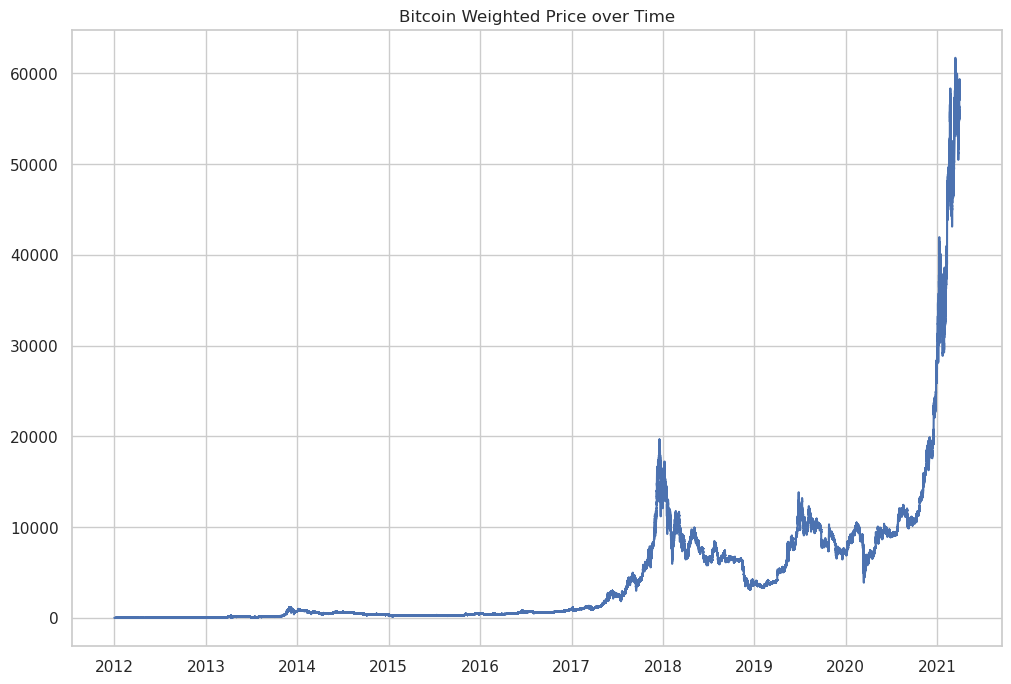

In [11]:
# plot a timeseries of the timestamp vs weighted price
plt.figure(figsize=(12, 8))
plt.plot(original_df['Timestamp'], original_df['Weighted_Price'])
plt.title('Bitcoin Weighted Price over Time')


In [21]:
from tqdm import tqdm

In [ ]:
df = original_df.copy()

Text(0.5, 0, 'Difference between non-null indices')

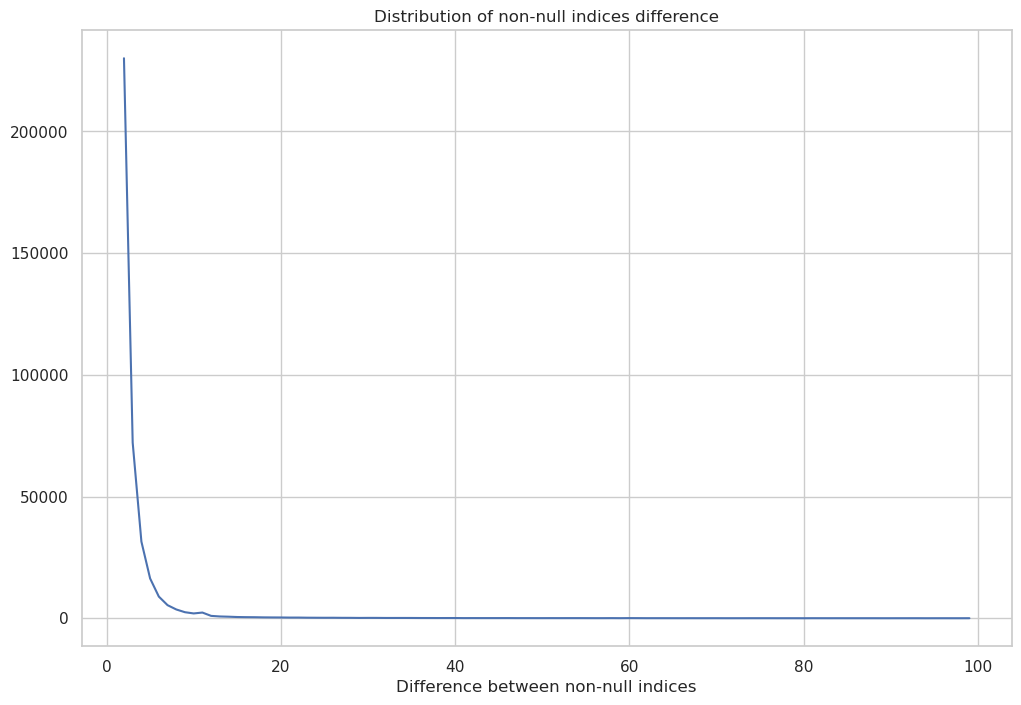

In [41]:
import numpy as np

# get row index of non-null values df['Weighted_Price']
indices = np.where(df['Weighted_Price'].notnull())[0]
indices_diff = pd.Series(indices).diff()
indices_diff = indices_diff[indices_diff > 1]
unique, counts = np.unique(indices_diff, return_counts=True)

# plot all unique values < 100
plt.figure(figsize=(12, 8))
plt.plot(unique[unique < 100], counts[unique < 100])
plt.title('Distribution of non-null indices difference')
plt.xlabel('Difference between non-null indices')

In [25]:
# obtain hourly data
df_hourly = df.resample('H', on='Timestamp').mean()
df_hourly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4,4,4,4,0,2,4
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# percentage of null values in each column
df_hourly.isnull().sum()/len(df_hourly)*100

Open                4
High                4
Low                 4
Close               4
Volume_(BTC)        4
Volume_(Currency)   4
Weighted_Price      4
dtype: float64

### 1. Handling null values

In [58]:
# obtain hourly data
df = original_df.resample('H', on='Timestamp').mean()

Text(0.5, 0, 'Difference between non-null indices')

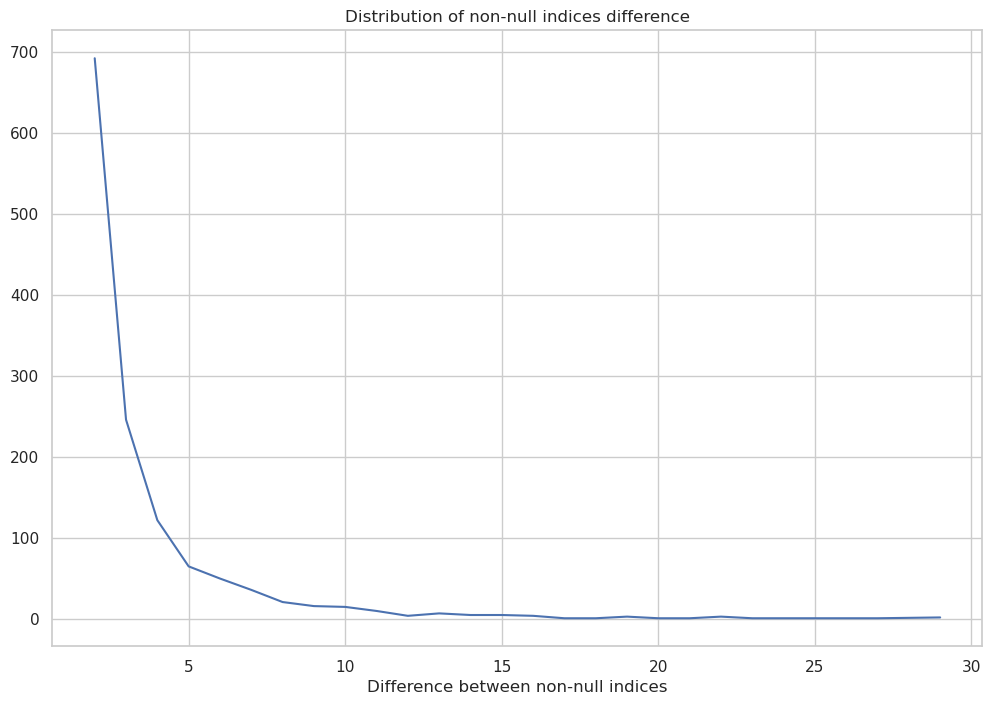

In [59]:
# get row index of non-null values df['Weighted_Price']
indices = np.where(df['Weighted_Price'].notnull())[0]
indices_diff = pd.Series(indices).diff()
indices_diff = indices_diff[indices_diff > 1]
unique, counts = np.unique(indices_diff, return_counts=True)

# plot all unique values < 100
plt.figure(figsize=(12, 8))
plt.plot(unique[unique < 100], counts[unique < 100])
plt.title('Distribution of non-null indices difference')
plt.xlabel('Difference between non-null indices')

In [60]:
# use forward fill to fill null values
df = df.fillna(method='ffill')
# do backfill incase there are null values at the start
if df.isnull().sum().sum() > 0:
    df = df.fillna(method='bfill')

df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

### 2. Define target buy 'signal' for dataset

In [61]:
# target buy signal
df['signal'] = 0
df.loc[df['Close'] > df['Close'].shift(1), 'signal'] = 1

### 3. Add technical indicators as features

In [62]:
''' Technical Indicators '''

#Calculation of moving average
def ma(df, n):
    return pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))

# exponentially weighted moving average 
def ema(df, n):
    return pd.Series(df['Close'].ewm(span=n,min_periods=n).mean(), name='EMA_' + str(n))

#Calculation of price momentum
def mom(df, n):     
    return pd.Series(df.diff(n), name='Momentum_' + str(n))  

# rate of change
def roc(df, n):  
    M = df.diff(n - 1) ; N = df.shift(n - 1)  
    return pd.Series(((M / N) * 100), name = 'ROC_' + str(n)) 

# relative strength index
def rsi(df, period):
    delta = df.diff().dropna()
    u = delta * 0; d = u.copy()
    u[delta > 0] = delta[delta > 0]; d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

# stochastic oscillators slow & fast
def sto(close, low, high, n,id): 
    stok = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    if(id is 0):
        return stok
    else:
        return stok.rolling(3).mean()

In [63]:
def tech_indi(ldf,tr_id=True):

    ''' Moving Average '''
    ldf['MA21'] = ma(ldf,10)
    ldf['MA63'] = ma(ldf, 30)
    ldf['MA252'] = ma(ldf, 200)
    lst_MA = ['MA21','MA63','MA252']

    ''' Exponentially Weighted Moving Average '''
    ldf['EMA10'] = ema(ldf, 10)
    ldf['EMA30'] = ema(ldf, 30)
    ldf['EMA200'] = ema(ldf, 200)
    lst_EMA = ['EMA10','EMA30','EMA200']

    ''' Momentum '''
    ldf['MOM10'] = mom(ldf['Close'], 10)
    ldf['MOM30'] = mom(ldf['Close'], 30)
    lst_MOM = ['MOM10','MOM30']

    ''' Relative Strength Index '''
    ldf['RSI10'] = rsi(ldf['Close'], 10)
    ldf['RSI30'] = rsi(ldf['Close'], 30)
    ldf['RSI200'] = rsi(ldf['Close'], 200)
    lst_RSI = ['RSI10','RSI30','RSI200']

    ''' Slow Stochastic Oscillators '''
    ldf['%K10'] = sto(ldf['Close'], ldf['Low'], ldf['High'],5,0)
    ldf['%K30'] = sto(ldf['Close'], ldf['Low'], ldf['High'],10,0)
    ldf['%K200'] = sto(ldf['Close'], ldf['Low'], ldf['High'], 20,0)
    lst_pK = ['%K10','%K30','%K200']

    ''' Fast Stochastic Oscillators '''
    ldf['%D10'] = sto(ldf['Close'], ldf['Low'], ldf['High'], 10,1)
    ldf['%D30'] = sto(ldf['Close'], ldf['Low'], ldf['High'], 30,1)
    ldf['%D200'] = sto(ldf['Close'], ldf['Low'], ldf['High'], 200,1)
    lst_pD = ['%D10','%D30','%D200']

In [64]:
tech_indi(df)

In [68]:
# use forward fill to fill null values
df = df.fillna(method='ffill')
# do backfill incase there are null values at the start
if df.isnull().sum().sum() > 0:
    df = df.fillna(method='bfill')

df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
signal               0
MA21                 0
MA63                 0
MA252                0
EMA10                0
EMA30                0
EMA200               0
MOM10                0
MOM30                0
RSI10                0
RSI30                0
RSI200               0
%K10                 0
%K30                 0
%K200                0
%D10                 0
%D30                 0
%D200                0
dtype: int64

In [69]:
# split df into train, val, test -> 0.8, 0.1, 0.1
train_size = int(len(df)*0.8)
val_size = int(len(df)*0.1)
test_size = int(len(df)*0.1)

train_df = df[:train_size]
val_df = df[train_size:train_size+val_size]
test_df = df[train_size+val_size:]

In [70]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,signal,MA21,MA63,...,MOM30,RSI10,RSI30,RSI200,%K10,%K30,%K200,%D10,%D30,%D200
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31 07:00:00,4,4,4,4,0,2,4,0,4,5,...,0,100,100,75,100,100,100,100,100,100
2011-12-31 08:00:00,4,4,4,4,0,2,4,0,4,5,...,0,100,100,75,100,100,100,100,100,100
2011-12-31 09:00:00,4,4,4,4,0,2,4,0,4,5,...,0,100,100,75,100,100,100,100,100,100
2011-12-31 10:00:00,4,4,4,4,0,2,4,0,4,5,...,0,100,100,75,100,100,100,100,100,100
2011-12-31 11:00:00,4,4,4,4,0,2,4,0,4,5,...,0,100,100,75,100,100,100,100,100,100


### 4. training models

In [79]:
models = []
# Lightweight Models 
models.append(('LDA', LinearDiscriminantAnalysis()))  # Unsupervised Model 
# models.append(('KNN', KNeighborsClassifier()))  # Unsupervised Model
models.append(('TREE', DecisionTreeClassifier())) # Supervised Model
models.append(('NB', GaussianNB())) # Unsupervised Model

# More Advanced Models
models.append(('GBM', GradientBoostingClassifier(n_estimators=25)))
# models.append(('XGB',XGBClassifier(n_estimators=25,eval_metric='logloss')))
# models.append(('CAT',CatBoostClassifier(silent=True,
#                                         n_estimators=25)))
models.append(('RF', RandomForestClassifier(n_estimators=25)))

In [87]:
models

[('LDA', LinearDiscriminantAnalysis()),
 ('TREE', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('GBM', GradientBoostingClassifier(n_estimators=25)),
 ('RF', RandomForestClassifier(n_estimators=25))]

In [80]:
# eval_id (T/F): [CV,Train,Test,all]

def modelEval(ldf,feature='signal',split_id=[None,None],eval_id=[True,True,True,True],
              n_fold=5,scoring='accuracy',plot_id=[False,True],cv_yrange=None,hm_vvals=[0.5,1.0,0.75]):
    
    print('Evaluation Function')
    print(f'Cross Validation Activated, n_splits : {n_fold}, scoring metric: {scoring}')
    if(eval_id[2]):
        if(split_id[0] is not None):
            print(f'Train/Evaluation Set Spit Activated: {split_id[0]}')
        if(split_id[1] is not None):
            print(f'Train/Evaluation Set Split made at {split_id[1]}')
    
    ''' 1. Split Train/Evaluation <DataFrame> Set Split '''
    
    # split_id : Train/Test split [%,timestamp], whichever is not None
    # test_id : Evaluate trained model on test set only
    
    if(split_id[0] is not None):
        # General Percentage Split (Non Shuffle requied for Time Series)
        train_df,eval_df = train_test_split(ldf,test_size=split_id[0],shuffle=False)
    elif(split_id[1] is not None):
        # specific time split 
        train_df = df.loc[:split_id[1]]; eval_df = df.loc[split_id[1]:] 
    else:
        print('Choose One Splitting Method Only')
        
    ''' 2. Train/Test Feature Matrices + Target Variables Split'''
    
    y_train = train_df[feature]
    X_train = train_df.loc[:, train_df.columns != feature]
    y_eval = eval_df[feature]
    X_eval = eval_df.loc[:, eval_df.columns != feature]
    X_one = pd.concat([X_train,X_eval],axis=0)
    y_one = pd.concat([y_train,y_eval],axis=0)
    
    print('');print(f'Using Features: {X_train.columns}')
    print(f'Target Variable: {feature}');print('')
        
    ''' 3. Visualise Training/Test Data'''
    if(plot_id[0]):
        
        # plot the training data
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=train_df.index, y=train_df['signal'],mode='lines',name='Training Data', line={'width': 0.25}))
        fig.update_layout(height=300,width=800,template='plotly_white',title='Training Signal Visualisation',
                          margin=dict(l=50,r=80,t=50,b=40))
        
        # Plot the test data as well 
        if(eval_id[2]):
            fig.add_trace(go.Scatter(x=eval_df.index, y=eval_df['signal'],mode='lines',name='Test Data',line={'width': 0.25}))
            fig.update_layout(title='Training/Test Signal Visualisation')
        fig.show()
    
    ''' 4. Cross Validation, Training/Evaluation, one evaluation'''
    lst_res = []; names = []; lst_train = []; lst_eval = []; lst_one = []; lst_res_mean = []
    if(any(eval_id)):
        for name, model in models:  # cycle through models & evaluate either cv or train/test
            names.append(name)
            
            # Cross Validation Model on Training Se
            if(eval_id[0]):
                t0=time.time()
                kfold = KFold(n_splits=n_fold)
                cv_res = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
                t1 = time.time()
                lst_res.append(cv_res)
                tt1 = t1-t0 # total time for n_fold cross evaluation
                
            # Evaluate Fit Model on Training Data
            t2 = time.time()
            if(eval_id[1]):
                t2 = time.time()
                res = model.fit(X_train,y_train)
                train_res = accuracy_score(res.predict(X_train),y_train); lst_train.append(train_res)
            if(eval_id[2]):
                if(eval_id[1] is False):  # If training hasn't been called yet
                    res = model.fit(X_train,y_train)
                eval_res = accuracy_score(res.predict(X_eval),y_eval); lst_eval.append(eval_res)
            t3 = time.time()
            tt2 = t3-t2 # total time for training/evaluation train/prediction
            
            # Evaluate model on entire dataset
            if(eval_id[3]):
                t4 = time.time()
                res = model.fit(X_one,y_one)
                one_res = accuracy_score(res.predict(X_one),y_one); lst_one.append(one_res)
                t5 = time.time()
                tt3 = t5-t4 # total time for training & evaluation on whole dataframe
            
            ''' [out] Verbal Outputs '''
            # Cross Validation / Training / Evaluation Model Evaluation / Section Times
            lst_res_mean.append(cv_res.mean())
            fn1 = cv_res.mean(); fn2 = cv_res.std();
            fn3 = train_res; fn4 = eval_res; fn5 = one_res
            print(f"{name} : {fn1:.3f}({fn2:.3f}) -> {tt1:.2f}s | {fn3:.3f} & {fn4:.3f} -> {tt2:.2f}s | {fn5:.3f} -> {tt3:.2}s")
      
    s0 = pd.Series(np.array(lst_res_mean),index=names)
    s1 = pd.Series(np.array(lst_train),index=names)
    s2 = pd.Series(np.array(lst_eval),index=names)
    s3 = pd.Series(np.array(lst_one),index=names)
    pdf = pd.concat([s0,s1,s2,s3],axis=1)
    pdf.columns = ['cv_average','train','test','all']
    s4 = pd.Series([tt1,tt2,tt3],index=['cv','train/test','all'])
        
    ''' 5. Visual Ouputs '''
    if(plot_id[1]): 
        
        sns.set(style="whitegrid")
        fig,ax = plt.subplots(1,2,figsize=(15,4))
        ax[0].set_title(f'{n_fold} Cross Validation Results')
        sns.boxplot(data=lst_res, ax=ax[0], orient="v",width=0.3)
        ax[0].set_xticklabels(names)
        sns.stripplot(data=lst_res,ax=ax[0], orient='v',color=".3",linewidth=1)
        ax[0].set_xticklabels(names)
        ax[0].xaxis.grid(True)
        ax[0].set(xlabel="")
        if(cv_yrange is not None):
            ax[0].set_ylim(cv_yrange)
        sns.despine(trim=True, left=True)
    
        sns.heatmap(pdf,vmin=hm_vvals[0],vmax=hm_vvals[1],center=hm_vvals[2],
                    ax=ax[1],square=False,lw=2,annot=True,fmt='.3f',cmap='Blues')
        ax[1].set_title('Accuracy Scores')
        plt.show()

Evaluation Function
Cross Validation Activated, n_splits : 5, scoring metric: accuracy
Train/Evaluation Set Spit Activated: 0.2

Using Features: Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'MA21', 'MA63', 'MA252', 'EMA10', 'EMA30', 'EMA200',
       'MOM10', 'MOM30', 'RSI10', 'RSI30', 'RSI200', '%K10', '%K30', '%K200',
       '%D10', '%D30', '%D200'],
      dtype='object')
Target Variable: signal

LDA : 0.780(0.041) -> 0.47s | 0.798 & 0.793 -> 0.11s | 0.800 -> 0.13s
TREE : 0.793(0.053) -> 10.04s | 1.000 & 0.788 -> 2.26s | 1.000 -> 3.1s
NB : 0.649(0.033) -> 0.19s | 0.667 & 0.527 -> 0.06s | 0.680 -> 0.06s
GBM : 0.806(0.046) -> 52.44s | 0.832 & 0.817 -> 12.06s | 0.827 -> 1.6e+01s
RF : 0.831(0.053) -> 24.93s | 0.999 & 0.860 -> 6.65s | 0.999 -> 8.9s


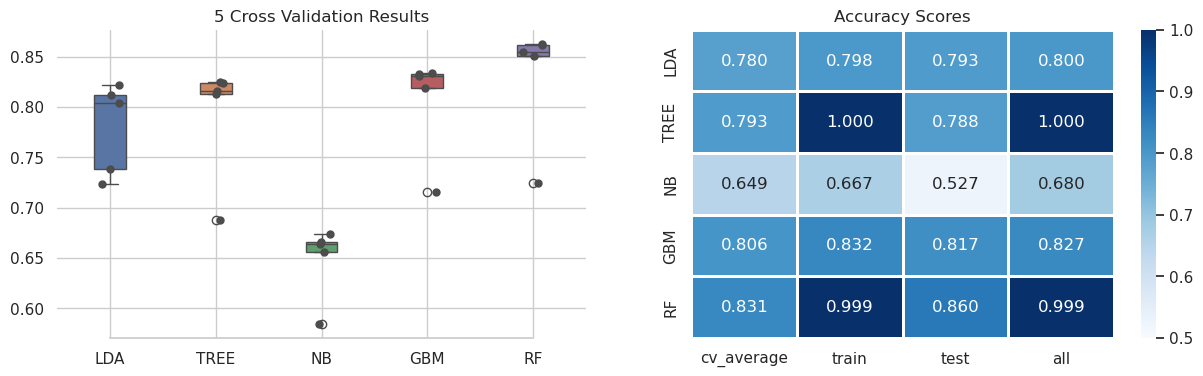

In [82]:
modelEval(train_df,split_id=[0.2,None],plot_id=[False,True])


In [84]:
from tqdm import tqdm

In [92]:
def calculate_returns(model, train_df, eval_df, initial_portfolio_value=10000.0):
    bought = 0
    purchase_price = -1.0
    portfolio_value = initial_portfolio_value
    feature = 'signal'

    y_train = train_df[feature]
    X_train = train_df.loc[:, train_df.columns != feature]
    X_eval = eval_df.loc[:, eval_df.columns != feature]
    
    # model fit
    res = model.fit(X_train,y_train)
    pred_signal = res.predict(X_eval)

    # pred_df -> X_eval + pred_signal
    pred_df = X_eval.copy()
    pred_df['signal'] = pred_signal

    # assuming entire portfolio is used to buy the stock
    print("no. of rows: ", len(pred_df))
    for index, row in (pred_df.iterrows()):
        if row['signal']==0 and bought==1:
            bought = 0
            portfolio_value += portfolio_value*(row['Close']-purchase_price)/purchase_price
            # portforlio value changes by the percentage change in price
        elif row['signal']==1 and bought==0:
            bought = 1
            purchase_price = row['Close']

    print("initial portfolio value: ", initial_portfolio_value)
    print("final portfolio value: ", portfolio_value)
    print("percentage returns: ", (portfolio_value-initial_portfolio_value)/initial_portfolio_value*100)
        

In [93]:
for model in models:
    print("model: ", model[0])
    calculate_returns(model[1], train_df, val_df)
    print()

model:  LDA
no. of rows:  8106
initial portfolio value:  10000.0
final portfolio value:  621767.415085089
percentage returns:  6117.67415085089

model:  TREE
no. of rows:  8106
initial portfolio value:  10000.0
final portfolio value:  138999.70236142198
percentage returns:  1289.9970236142199

model:  NB
no. of rows:  8106
initial portfolio value:  10000.0
final portfolio value:  76598.5644363963
percentage returns:  665.9856443639629

model:  GBM
no. of rows:  8106
initial portfolio value:  10000.0
final portfolio value:  369073.13165513636
percentage returns:  3590.7313165513633

model:  RF
no. of rows:  8106
initial portfolio value:  10000.0
final portfolio value:  267739.8228191141
percentage returns:  2577.398228191141

